In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd  
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.preprocessing import sequence
from keras import backend as K
from keras.preprocessing.text import Tokenizer
from nltk.tokenize import WordPunctTokenizer
from keras.layers.core import Dense, Dropout, Activation
from keras.layers import Dense, Dropout, Reshape, Flatten, concatenate, Input, Conv1D, Embedding, MaxPooling1D
from keras.preprocessing.sequence import pad_sequences

In [6]:
cd drive/MyDrive/Deep_Learning_Project/

/content/drive/MyDrive/Deep_Learning_Project


# Combining twitter dataset

In [11]:
# df.to_csv('twitter_sentiment_dataset.csv')
df = open('Codemixed.txt', 'r', encoding='utf-8')
df = df.read()
df.head()

AttributeError: ignored

# Data Cleaning 

In [ ]:
# import re
# # print(df.text[1])
# for i in range(10):
#     df.text[i] = re.sub(r'@[A-Za-z0-9]+','',df.text[i])
# df

In [ ]:
# for i in range(20):
#     df.text[i] = re.sub('https?://[A-Za-z0-9./]+','',df.text[i])
# df

In [ ]:
# for i in range(50):
#     df.text[i] = re.sub("[^a-zA-Z]", " ", df.text[i])
# df

In [ ]:
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'

# combined_pat = r'|'.join((pat1, pat2))

def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
#     clean = re.sub(combined_pat, '', souped)
    clean1 = re.sub(pat1, '', souped)
    clean = re.sub(pat2, '', clean1)
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()


In [ ]:
# testing = df.text[:100]
# test_result = []
# for t in testing:
#     test_result.append(tweet_cleaner(t))
# test_result

In [ ]:
dff.shape

(21000, 2)

In [ ]:
nums = [0,10000,21500]
clean_tweet_texts_h = []
for i in range(nums[0],nums[2]):
    if( (i+1)%10000 == 0 ):
        print("Tweets %d of %d has been processed" %(i+1, nums[2]))                                                                    
    clean_tweet_texts_h.append(tweet_cleaner(dfh['text'][i]))

C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:282: UserWarning: "https://t.co/UP84FttcD1

Awesome" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup


Tweets 10000 of 21500 has been processed
Tweets 20000 of 21500 has been processed


In [ ]:
nums = [0,10000,21000]
clean_tweet_texts_s = []
for i in range(nums[0],nums[2]):
    if( (i+1)%10000 == 0 ):
        print("Tweets %d of %d has been processed" %(i+1, nums[2]))                                                                    
    clean_tweet_texts_s.append(tweet_cleaner(dfs['text'][i]))

Tweets 10000 of 21000 has been processed


C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:282: UserWarning: "https://t.co/XDl0Q1g4NQ
Sorrow.😭" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup


Tweets 20000 of 21000 has been processed


In [ ]:
nums = [0,10000,21000]
clean_tweet_texts_f = []
for i in range(nums[0],nums[2]):
    if( (i+1)%10000 == 0 ):
        print("Tweets %d of %d has been processed" %(i+1, nums[2]))                                                                    
    clean_tweet_texts_f.append(tweet_cleaner(dff['text'][i]))

Tweets 10000 of 21000 has been processed
Tweets 20000 of 21000 has been processed


In [ ]:
len(clean_tweet_texts_f)

21000

In [ ]:
clean_df_h = pd.DataFrame(clean_tweet_texts_h,columns=['text'])
clean_df_h['target'] = 0
print(clean_df_h.head())

clean_df_s = pd.DataFrame(clean_tweet_texts_s,columns=['text'])
clean_df_s['target'] = 1
print(clean_df_s.head())

clean_df_f = pd.DataFrame(clean_tweet_texts_f,columns=['text'])
clean_df_f['target'] = 2
print(clean_df_f.head())

                                                text  target
0  i want to play ludo king with you please insta...       0
1  awesome haha long may it continue we are watch...       0
2                       awesome thank you great list       0
3  awesome how he touched people by not only his ...       0
4  how sweet alexxis birthday message to happy bi...       0
                                                text  target
0  day post opp dressings still on not sure if th...       1
1  it s a fake video if trump would address admit...       1
2  t that s a bad thing it means you re not even ...       1
3  we are efforting outreach right lol you all li...       1
4  based media clips it s most unlikely rhea chak...       1
                                                text  target
0  good monday jamal murray van gogh big east lad...       2
1  it just absolutely shatters my heart that bc c...       2
2               fear allah don t lie like that again       2
3  these perpetrators fe

In [ ]:
clean_df = pd.concat([clean_df_h,clean_df_s,clean_df_f], axis = 0, ignore_index = True)
clean_df.to_csv('clean_tweet.csv',encoding='utf-8')
# csv = 'clean_tweet.csv'
# tweet_df = pd.read_csv(csv,index_col=0)
# tweet_df.head()

In [ ]:
csv = 'clean_tweet.csv'
tweet_df = pd.read_csv(csv,index_col=0)
tweet_df.head()

,text,target
0,i want to play ludo king with you please insta...,0
1,awesome haha long may it continue we are watch...,0
2,awesome thank you great list,0
3,awesome how he touched people by not only his ...,0
4,how sweet alexxis birthday message to happy bi...,0


In [ ]:
tweet_df[tweet_df.isnull().any(axis=1)]

,text,target
231,NaN,0
373,NaN,0
480,NaN,0
496,NaN,0
529,NaN,0
596,NaN,0
835,NaN,0
855,NaN,0
941,NaN,0
956,NaN,0


In [ ]:
tweet_df.dropna(inplace=True)
tweet_df.reset_index(drop=True,inplace=True)
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63328 entries, 0 to 63327
Data columns (total 2 columns):
text      63328 non-null object
target    63328 non-null int64
dtypes: int64(1), object(1)
memory usage: 989.6+ KB


In [ ]:
# nltk.download('punkt')
tokens = [word_tokenize(sen) for sen in tweet_df.text]

In [ ]:
def lower_token(tokens): 
    return [w.lower() for w in tokens]    
    
lower_tokens = [lower_token(token) for token in tokens]

In [ ]:
stoplist = stopwords.words('english')
def removeStopWords(tokens): 
    return [word for word in tokens if word not in stoplist]

filtered_words = [removeStopWords(sen) for sen in lower_tokens]
tweet_df['Final_text'] = [' '.join(sen) for sen in filtered_words]
tweet_df['word_tokens'] = filtered_words

In [ ]:
happy = []
sad = []
fear = []
for l in tweet_df.target:
    if(l == 0):
        happy.append(1)
        sad.append(0)
        fear.append(0)
    elif(l == 1):
        happy.append(0)
        sad.append(1)
        fear.append(0)
    elif(l == 2):
        happy.append(0)
        sad.append(0)
        fear.append(1)

In [ ]:
tweet_df['happy']= happy
tweet_df['sad']= sad
tweet_df['fear']= fear

In [ ]:
tweet_df

,text,target,Final_text,word_tokens,happy,sad,fear
0,i want to play ludo king with you please insta...,0,want play ludo king please install android ios,"[want, play, ludo, king, please, install, andr...",1,0,0
1,awesome haha long may it continue we are watch...,0,awesome haha long may continue watching new ba...,"[awesome, haha, long, may, continue, watching,...",1,0,0
2,awesome thank you great list,0,awesome thank great list,"[awesome, thank, great, list]",1,0,0
3,awesome how he touched people by not only his ...,0,awesome touched people talents character relat...,"[awesome, touched, people, talents, character,...",1,0,0
4,how sweet alexxis birthday message to happy bi...,0,sweet alexxis birthday message happy birthday ...,"[sweet, alexxis, birthday, message, happy, bir...",1,0,0
5,sorry to bother you and it was brilliant and w...,0,sorry bother brilliant weird awesome,"[sorry, bother, brilliant, weird, awesome]",1,0,0
6,you look awesome,0,look awesome,"[look, awesome]",1,0,0
7,just saw in an awesome panel at the festivalof...,0,saw awesome panel festivalofbooks well done,"[saw, awesome, panel, festivalofbooks, well, d...",1,0,0
8,wray s fbi is awesome,0,wray fbi awesome,"[wray, fbi, awesome]",1,0,0
9,nolacak kanka d n p taga destek vermen de yete...,0,nolacak kanka n p taga destek vermen de yeter ...,"[nolacak, kanka, n, p, taga, destek, vermen, d...",1,0,0


In [ ]:
# tweet_df.to_csv('processed_data.csv', )
# tweet_df = pd.read_csv('processed_data.csv')

In [ ]:
data_train, data_test = train_test_split(tweet_df, test_size=0.2, random_state=50)

In [ ]:
data_train.shape
data_test.shape

(12666, 7)

In [ ]:
y_train = data_train['target']
y_test = data_test['target']
print(set(y_train))
print(set(y_test))


{0, 1, 2}
{0, 1, 2}


In [ ]:
y_train = y_train.astype(str) 
y_test = y_test.astype(str) 
# type(y_train[0])
# type(y_test[0])

In [ ]:
label_names = ['happy', 'sad', 'fear']

In [ ]:
y_train = data_train[label_names].values
y_test = data_test[label_names].values

In [ ]:
# print(y_test)
# print(y_train)

In [ ]:
train_words = [word for tokens in data_train["word_tokens"] for word in tokens]
# print(train_words)
len(train_words)

384979

In [ ]:
tweet_train_lengths = [len(tokens) for tokens in data_train["word_tokens"]]
# print(tweet_train_lengths)
max_length = max(tweet_train_lengths)

In [ ]:
train_vocab = sorted(list(set(train_words)))
# print(train_vocab)
len(train_vocab)

38357

In [ ]:
print("Total number words in training dataset : ", len(train_words))
print("Training dataset vocabulary size : ", len(train_vocab))
print("Maximum processed tweet length : ", max(tweet_train_lengths))

Total number words in training dataset :  384979
Training dataset vocabulary size :  38357
Maximum processed tweet length :  24


In [ ]:
test_words = [word for tokens in data_test["word_tokens"] for word in tokens]
# print(test_words)
len(test_words)

96546

In [ ]:
tweet_test_lengths = [len(tokens) for tokens in data_test["word_tokens"]]
# print(tweet_test_lengths)
max(tweet_test_lengths)

21

In [ ]:
test_vocab = sorted(list(set(test_words)))
# print(test_vocab)
len(test_vocab)

17201

In [ ]:
print("Total number words in testing dataset : ", len(test_words))
print("Testing dataset vocabulary size : ", len(test_vocab))
print("Maximum processed tweet length : ", max(tweet_test_lengths))

Total number words in testing dataset :  96546
Testing dataset vocabulary size :  17201
Maximum processed tweet length :  21


In [ ]:
tokenizer = Tokenizer()
tokenizer = Tokenizer(num_words=len(train_vocab), lower=True, char_level=False)
tokenizer.fit_on_texts(data_train["Final_text"].tolist())
training_sequences = tokenizer.texts_to_sequences(data_train["Final_text"].tolist())

train_word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(train_word_index))


Found 38357 unique tokens.


In [ ]:
# print(train_word_index)
# training_sequences

In [ ]:
vocab_size = len(train_word_index)
vocab_size

38357

In [ ]:
train_cnn_data = pad_sequences(training_sequences, maxlen=max_length)

In [ ]:
test_sequences = tokenizer.texts_to_sequences(data_test["Final_text"].tolist())
test_cnn_data = pad_sequences(test_sequences, maxlen=max_length)

In [ ]:
train_cnn_data.shape

(50662, 24)

In [ ]:
test_cnn_data.shape

(12666, 24)

In [ ]:
x_train = train_cnn_data
x_test = test_cnn_data

In [ ]:
embedding_dim = vocab_size +1

In [ ]:
# define model
model = Sequential()
model.add(Embedding(embedding_dim, 100, input_length=max_length))
model.add(Conv1D(filters=32, kernel_size=8, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='sigmoid'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 24, 100)           3835800   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 17, 32)            25632     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 8, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 33        
Total params: 3,864,035
Trainable params: 3,864,035
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compile network
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit network
history = model.fit(x_train, y_train, epochs=30, verbose=1)


Epoch 1/30
50662/50662 [==============================] - 184s 4ms/step - loss: 0.4393 - acc: 0.7962
Epoch 2/30
50662/50662 [==============================] - 184s 4ms/step - loss: 0.2487 - acc: 0.9012
Epoch 3/30
50662/50662 [==============================] - 188s 4ms/step - loss: 0.1289 - acc: 0.9523
Epoch 4/30
50662/50662 [==============================] - 178s 4ms/step - loss: 0.0745 - acc: 0.9721
Epoch 5/30
50662/50662 [==============================] - 179s 4ms/step - loss: 0.0543 - acc: 0.9787
Epoch 6/30
50662/50662 [==============================] - 181s 4ms/step - loss: 0.0474 - acc: 0.9808
Epoch 7/30
50662/50662 [==============================] - 181s 4ms/step - loss: 0.0436 - acc: 0.9828
Epoch 8/30
50662/50662 [==============================] - 177s 4ms/step - loss: 0.0400 - acc: 0.9832
Epoch 9/30
50662/50662 [==============================] - 194s 4ms/step - loss: 0.0383 - acc: 0.9841
Epoch 10/30
50662/50662 [==============================] - 182s 4ms/step - loss: 0.0370 - a

In [ ]:
train_acc = history.history['acc']
train_loss =history.history['loss']

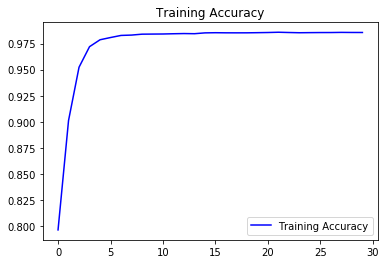

<Figure size 432x288 with 0 Axes>

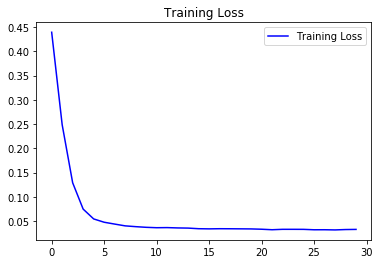

In [ ]:
epochs = range(len(train_acc)) 
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.title('Training Accuracy')
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

In [ ]:
predictions = model.predict(x_test, verbose=1)

12666/12666 [==============================] - 2s 150us/step


In [ ]:
labels = [0, 1, 2]
prediction_labels=[]
for p in predictions:
    prediction_labels.append(labels[np.argmax(p)])

In [ ]:
accuracy = sum(data_test.target==prediction_labels)/len(prediction_labels)
print('Test Accuracy : ', accuracy)

Test Accuracy :  0.8105952944891837


In [ ]:
data_test.target.value_counts()

0    4266
1    4263
2    4137
Name: target, dtype: int64

In [ ]:
# # evaluate
# loss, acc = model.evaluate(x_test, y_test, verbose=1)
# print('Test Accuracy: %f' % (acc*100))